# Runtime Correlations

In [59]:
import pandas as pd

In [60]:
#import relevant tables

movie_budgets = pd.read_csv("./data/tngross.csv")
movie_production = pd.read_csv("./data/tnproduction.csv")

In [61]:
movie_production

,Unnamed: 0,runtime_minutes,genres,production_company,production_country
0,0,181 minutes,Action,Marvel Studios,United States
1,1,136 minutes,Adventure,Walt Disney Pictures,United States
2,2,141 minutes,Action,Marvel Studios,United States
3,3,136 minutes,Adventure,"Lucasfilm, Bad Robot",United States
4,4,156 minutes,Action,Marvel Studios,United States
...,...,...,...,...,...
6095,6095,90 minutes,Drama,None,United States
6096,6096,88 minutes,Adventure,Phebean Films,Nigeria
6097,6097,None,Documentary,None,United States
6098,6098,None,Horror,None,United States


In [62]:
movie_budgets

,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,0,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,797,800,564"
1,1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802"
2,2,"Apr 22, 2015",Avengers: Age of Ultron,"$365,000,000","$459,005,868","$1,395,316,979"
3,3,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,064,615,817"
4,4,"Apr 25, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,044,540,523"
...,...,...,...,...,...,...
6095,6095,"Mar 17, 2015",Closure,"$100,000",$0,$0
6096,6096,"Aug 29, 2015",Lunch Time Heroes,"$100,000",$0,$0
6097,6097,"Mar 25, 2015",Open Secret,"$100,000",$0,$0
6098,6098,"Nov 10, 2015",The Night Visitor,"$100,000",$0,$0


In [63]:
#merge two tables together on index

df = movie_production.merge(movie_budgets, left_index=True, right_index=True)

In [64]:
#Clean up data by removing '$' and ',' from the production budget and worldwide gross and then convert columns to integers

df['production_budget'] = df['production_budget'].str.replace('$', '')
df['production_budget'] = df['production_budget'].str.replace(',', '').astype(int)
df['worldwide_gross'] = df['worldwide_gross'].str.replace('$', '')
df['worldwide_gross'] = df['worldwide_gross'].str.replace(',', '').astype(int)

In [65]:
#drop unnecessary columns

df = df.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1)
df

,runtime_minutes,genres,production_company,production_country,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,181 minutes,Action,Marvel Studios,United States,"Apr 23, 2019",Avengers: Endgame,400000000,"$858,373,000",2797800564
1,136 minutes,Adventure,Walt Disney Pictures,United States,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,379000000,"$241,071,802",1045713802
2,141 minutes,Action,Marvel Studios,United States,"Apr 22, 2015",Avengers: Age of Ultron,365000000,"$459,005,868",1395316979
3,136 minutes,Adventure,"Lucasfilm, Bad Robot",United States,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,306000000,"$936,662,225",2064615817
4,156 minutes,Action,Marvel Studios,United States,"Apr 25, 2018",Avengers: Infinity War,300000000,"$678,815,482",2044540523
...,...,...,...,...,...,...,...,...,...
6095,90 minutes,Drama,None,United States,"Mar 17, 2015",Closure,100000,$0,0
6096,88 minutes,Adventure,Phebean Films,Nigeria,"Aug 29, 2015",Lunch Time Heroes,100000,$0,0
6097,None,Documentary,None,United States,"Mar 25, 2015",Open Secret,100000,$0,0
6098,None,Horror,None,United States,"Nov 10, 2015",The Night Visitor,100000,$0,0


In [66]:
#Exclude rows where there is no value given for runtime

# genres_df = df[(df['runtime_minutes'] != 'None')]

In [67]:
#Remove 'minutes' from runtime minutes category and convert to integer

# df['runtime_minutes'] = df['runtime_minutes'].str.replace('minutes', '')
# df['runtime_minutes'] = df['runtime_minutes'].astype(int)

In [68]:
#Check to make sure data types are accurate

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6100 entries, 0 to 6099
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   runtime_minutes     6100 non-null   object
 1   genres              6100 non-null   object
 2   production_company  6100 non-null   object
 3   production_country  6100 non-null   object
 4   release_date        6100 non-null   object
 5   movie               6100 non-null   object
 6   production_budget   6100 non-null   int64 
 7   domestic_gross      6100 non-null   object
 8   worldwide_gross     6100 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 429.0+ KB


In [69]:
#Remove rows from worldwide gross that have a value of 0

df = df[(df['worldwide_gross'] != 0)]
df

,runtime_minutes,genres,production_company,production_country,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,181 minutes,Action,Marvel Studios,United States,"Apr 23, 2019",Avengers: Endgame,400000000,"$858,373,000",2797800564
1,136 minutes,Adventure,Walt Disney Pictures,United States,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,379000000,"$241,071,802",1045713802
2,141 minutes,Action,Marvel Studios,United States,"Apr 22, 2015",Avengers: Age of Ultron,365000000,"$459,005,868",1395316979
3,136 minutes,Adventure,"Lucasfilm, Bad Robot",United States,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,306000000,"$936,662,225",2064615817
4,156 minutes,Action,Marvel Studios,United States,"Apr 25, 2018",Avengers: Infinity War,300000000,"$678,815,482",2044540523
...,...,...,...,...,...,...,...,...,...
6087,None,Drama,None,United States,"May 10, 1980",Penitentiary,100000,"$287,000",287000
6088,90 minutes,Comedy,None,United States,"Feb 6, 2004",The Lost Skeleton of Cadavra,100000,"$110,536",110536
6089,85 minutes,Thriller/Suspense,Snowfort Pictures,United States,"Mar 21, 2014",Cheap Thrills,100000,"$59,424",59424
6090,90 minutes,Documentary,Oscilloscope Pictures,United States,"Jun 19, 2014",The Past is a Grotesque Animal,100000,"$20,056",20056


In [70]:
#Create a new column that divides worldwide gross by production budget in order to get a ratio for profit

df['profit'] =  df['worldwide_gross'] / df['production_budget']

<ipython-input-70-974a5372038a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['profit'] =  df['worldwide_gross'] / df['production_budget']


In [71]:
#Sort data frame by profit in descending order

df = df.sort_values(by=['profit'], ascending=False)

# Start here for group notebook

In [72]:
#Exclude rows where there is no value given for runtime

runtime_df = df[(df['runtime_minutes'] != 'None')].copy()

In [73]:
#Remove 'minutes' from runtime minutes category and convert to integer

runtime_df['runtime_minutes'] = runtime_df['runtime_minutes'].str.replace('minutes', '')
runtime_df['runtime_minutes'] = runtime_df['runtime_minutes'].astype(int)

In [74]:
runtime_df.describe()

,runtime_minutes,production_budget,worldwide_gross,profit
count,4773.000000,4.773000e+03,4.773000e+03,4773.000000
mean,109.310706,3.754341e+07,1.149716e+08,4.829081
std,19.908741,4.506838e+07,1.976834e+08,17.413668
min,41.000000,1.000000e+05,1.700000e+01,0.000002
25%,95.000000,8.500000e+06,1.225475e+07,0.889254
50%,106.000000,2.100000e+07,4.440054e+07,2.159607
75%,120.000000,5.000000e+07,1.308710e+08,4.271830
max,260.000000,4.000000e+08,2.845900e+09,498.750000


Here we can see that the mean runtime for all the movies in our dataset is 109 minutes. Next, we'll check to see if there's a correlation between the runtime of movies and its profitability. 

In [75]:
#Calculate correlation of movie runtime and profitability

correlation = runtime_df['runtime_minutes'].corr(runtime_df['profit'])
correlation

-0.030769039757055326

This results tells us there's a negative cvorrelation between movie profitability and runtime (longer movies are less profitable and shorter movies are more pfotable), but it's a weak correlation. To dig in a bit further, let's divide the data into 2 dataframes: one with movies that made a profit and one with movies that didn't make a profit. That way we can compare the runtimes between those two groups to get a better sense of their similarity or difference.

In [76]:
#Create two new data frames, one that only includes profitable movies and one that only includes unprofitable movies

profitable = runtime_df[runtime_df['profit'] >= 1]
non_profitable = runtime_df[runtime_df['profit'] < 1]

In [99]:
profitable.describe()

,runtime_minutes,production_budget,worldwide_gross,profit
count,3456.000000,3.456000e+03,3.456000e+03,3456.000000
mean,110.286169,4.173212e+07,1.532401e+08,6.506777
std,20.337115,4.927727e+07,2.201779e+08,20.213430
min,41.000000,1.000000e+05,1.105360e+05,1.000265
25%,96.000000,9.500000e+06,3.132758e+07,1.895467
50%,107.000000,2.500000e+07,7.700959e+07,3.120961
75%,121.000000,5.500000e+07,1.802631e+08,5.453992
max,248.000000,4.000000e+08,2.845900e+09,498.750000


In [78]:
non_profitable.describe()

,runtime_minutes,production_budget,worldwide_gross,profit
count,1317.000000,1.317000e+03,1.317000e+03,1317.000000
mean,106.750949,2.655159e+07,1.454946e+07,0.426561
std,18.502450,2.869145e+07,2.219965e+07,0.319303
min,59.000000,1.000000e+05,1.700000e+01,0.000002
25%,94.000000,7.000000e+06,6.857800e+05,0.117508
50%,103.000000,1.800000e+07,6.200000e+06,0.390211
75%,116.000000,3.600000e+07,1.882158e+07,0.716541
max,260.000000,2.000000e+08,1.741313e+08,0.998889


In [79]:
#removing rows where worldwide gross = 0
non_profitable = non_profitable[(non_profitable['worldwide_gross'] != 0)]

In [80]:
#print mean runtimes of profitable and non-profitable movies
avg_runtime_profitable = profitable['runtime_minutes'].mean().round(2)
avg_runtime_non_profitable = non_profitable['runtime_minutes'].mean().round(2)

print(f'The mean runtime of profitable movies is {avg_runtime_profitable} minutes.')
print(f'The mean runtime of non-profitable movies is {avg_runtime_non_profitable} minutes.')

The mean runtime of profitable movies is 110.29 minutes.
The mean runtime of non-profitable movies is 106.75 minutes.


In [81]:
#print median runtimes of profitable and non-profitable
median_runtime_profitable = profitable['runtime_minutes'].median().round(2)
median_runtime_non_profitable = non_profitable['runtime_minutes'].median().round(2)

print(f'The median runtime of profitable movies is {median_runtime_profitable} minutes.')
print(f'The median runtime of non-profitable movies is {median_runtime_non_profitable} minutes.')

The median runtime of profitable movies is 107.0 minutes.
The median runtime of non-profitable movies is 103.0 minutes.


Here we see that the mean both profitable and non-profitable data sets are larger than their medians. This indicates their distriubutions are positivelty skewed. Next we'll look at the correlations between runtime and profitability for each data set.

In [82]:
#Calculate correlation of movie runtime and profitability for both the profitable and non-profitable data frames
correlation_profitable = profitable['runtime_minutes'].corr(profitable['profit'])
correlation_non_profitable = non_profitable['runtime_minutes'].corr(non_profitable['profit'])

print(f'The correlation of movie runtime and profitability for profitable movies is: {correlation_profitable}.')
print(f'The correlation of movie runtime and profitability for non-profitable movies is: {correlation_non_profitable}.')

The correlation of movie runtime and profitability for profitable movies is: -0.05098019410790402.
The correlation of movie runtime and profitability for non-profitable movies is: 0.12932930544517174.


Profitable movies have a weak negative correlation between runtime and profitablity while non-profitable movies have a slighlty larger positive correlation. Based on this, it's best to stick with shorter, as opposed to longer, running times for a greater chance at a successful movie.

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline

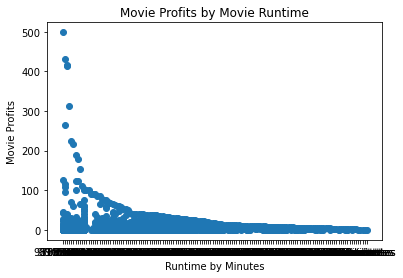

In [84]:
#Create a scatter plot of all movie runtimes based on profitability

fig, ax = plt.subplots()

ax.scatter(x = df['runtime_minutes'], y = df['profit'])
ax.set_title('Movie Profits by Movie Runtime')
ax.set_xlabel('Runtime by Minutes')
ax.set_ylabel('Movie Profits');

This scatterplot doesn't tell us too much information, although there does appear to be more profitable movies in the shorter runtimes as opposed to longer runtimes. 

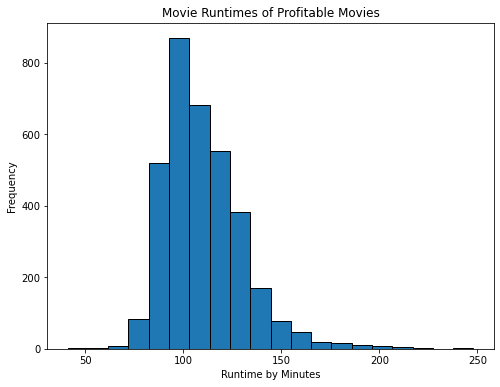

In [85]:

import numpy as np

fig, ax = plt.subplots(figsize = (8,6))

x=profitable['runtime_minutes']


ax.hist(x, edgecolor="black", bins=20)
ax.set_title('Movie Runtimes of Profitable Movies')
ax.set_xlabel('Runtime by Minutes')
ax.set_ylabel('Frequency');

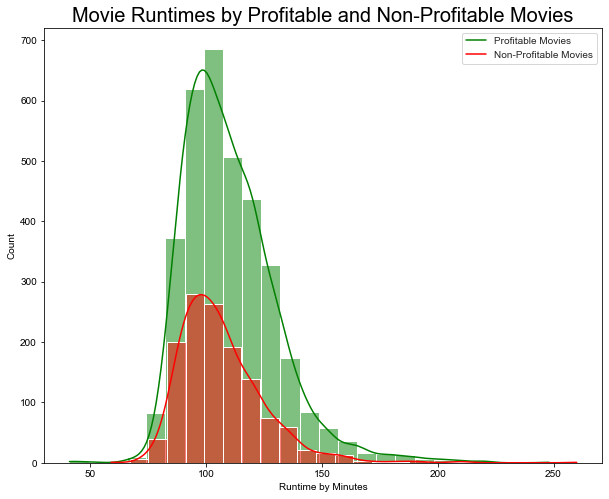

In [86]:
#Create a historgram with kde line of movie runtimes for both profitable movies and unprofitable movies

import seaborn as sns
fig, ax = plt.subplots(figsize = (10,8))
sns.set_style("whitegrid") 
sns.histplot(data=profitable, x="runtime_minutes", color="green", bins=25, kde=True)
plt.xlabel("Runtime by Minutes")
plt.title("Movie Runtimes by Profitable and Non-Profitable Movies", size=20)

sns.histplot(data=non_profitable, x="runtime_minutes", color="red", alpha  = 0.5, bins=25, kde=True)
plt.legend(labels=["Profitable Movies","Non-Profitable Movies"])

plt.savefig('movie_runtimes_profitable_and_non-Profitable Movies.png');

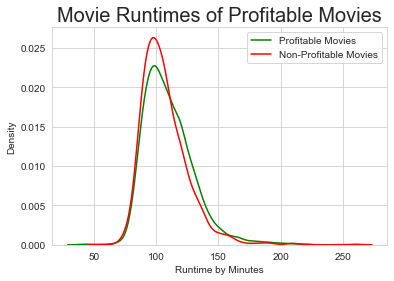

In [87]:
sns.set_style("whitegrid") 
sns.kdeplot(data=profitable, x="runtime_minutes", color="green")
sns.kdeplot(data=non_profitable, x="runtime_minutes", color="red")
plt.xlabel("Runtime by Minutes")
plt.title("Movie Runtimes of Profitable Movies", size=20)

plt.legend(labels=["Profitable Movies","Non-Profitable Movies"]);

In [88]:
#Create a new dataframe grouped by genre and arranged by descending profit amount

genre_df = df.groupby('genres').apply(lambda x: x.sort_values(by ='profit', ascending = False))
genre_df

runtime_minutes   genres  \
genres                                  
Action  6013      93 minutes   Action   
        5591     109 minutes   Action   
        5004     110 minutes   Action   
        5243     115 minutes   Action   
        3996     201 minutes   Action   
...                      ...      ...   
Western 3654     101 minutes  Western   
        3988            None  Western   
        1853            None  Western   
        1681            None  Western   
        4900     123 minutes  Western   

                                             production_company  \
genres                                                            
Action  6013                                     Roadshow Films   
        5591                                     United Artists   
        5004                    Eon Productions, United Artists   
        5243                    Eon Productions, United Artists   
        3996                             Aamir Khan Productions   
...                                                         ...   
Western 3654  Bedford Falls, Black Bicycle, IM Global, Potbo...   
        3988                                               None   
        1853                                               None   
        1681                                               None   
        4900                                               None   

                 production_country  release_date                  movie  \
genres                                                                     
Action  6013              Australia  Apr 12, 1979                Mad Max   
        5591         United Kingdom   May 8, 1963                 Dr. No   
        5004         United Kingdom  Dec 22, 1964             Goldfinger   
        5243         United Kingdom   Apr 8, 1964  From Russia With Love   
        3996                  India  Dec 21, 2016                 Dangal   
...                             ...           ...                    ...   
Western 3654          United States  Jun 29, 2018      Woman Walks Ahead   
        3988                 Canada  Apr 30, 2010                Gunless   
        1853          United States  Nov 24, 1999    Ride With the Devil   
        1681          United States  Nov 30, 2001          Texas Rangers   
        4900  Mexico, United States   Apr 7, 1965           Major Dundee   

              production_budget domestic_gross  worldwide_gross      profit  
genres                                                                       
Action  6013             200000     $8,750,000         99750000  498.750000  
        5591            1000000    $16,067,035         59567035   59.567035  
        5004            3000000    $51,100,000        124900000   41.633333  
        5243            2000000    $24,800,000         78900000   39.450000  
        3996            9500000    $12,391,761        305149461   32.120996  
...                         ...            ...              ...         ...  
Western 3654           12000000        $57,528           627538    0.052295  
        3988            9900000       $458,054           458054    0.046268  
        1853           35000000       $630,779           630779    0.018022  
        1681           38000000       $623,374           623374    0.016405  
        4900            3800000        $14,873            14873    0.003914  

[5747 rows x 10 columns]

In [89]:
#Rename genre category to genre_cateogry to avoid confusion

genre_df.rename({'genres': 'genre_category'}, axis=1, inplace=True)

In [90]:
#Get the number of movies for each genre

genre_df.value_counts('genre_category')

genre_category
Drama                  1556
Comedy                  960
Action                  736
Adventure               688
Thriller/Suspense       573
Horror                  455
Romantic Comedy         251
None                    128
Documentary             111
Black Comedy            102
Musical                 101
Western                  71
Concert/Performance      13
Multiple Genres           2
dtype: int64

In [91]:
#Drop genres with less than 50 movies as well as rows that have worldwide gross of 0

genre_df = genre_df.loc[genre_df['genre_category'] != 'Concert/Performance']
genre_df = genre_df.loc[genre_df['genre_category'] != 'None']
genre_df = genre_df.loc[genre_df['genre_category'] != 'Multiple Genres']
genre_df = genre_df.loc[genre_df['worldwide_gross'] != 0]


In [101]:
#Find the median profits of each genre

genre_df.groupby(['genre_category'])['profit'].median().sort_values(ascending = False)

genre_category
Horror               2.970818
Adventure            2.470881
Romantic Comedy      2.211184
Musical              2.151225
Action               2.092760
Comedy               1.763421
Black Comedy         1.636257
Thriller/Suspense    1.579101
Drama                1.387012
Western              1.294361
Documentary          1.087794
Name: profit, dtype: float64

In [100]:
#Find the mean profits of each genre

genre_df.groupby(['genre_category'])['profit'].mean().sort_values(ascending = False)

genre_category
Horror               11.411487
Musical               6.849120
Documentary           5.713746
Western               4.379252
Adventure             4.116338
Romantic Comedy       3.869508
Drama                 3.787328
Action                3.727429
Comedy                3.557024
Thriller/Suspense     2.930738
Black Comedy          2.816047
Name: profit, dtype: float64

In [94]:
horror = genre_df[(genre_df['genre_category'] == 'Horror')]
horror.head(50)

runtime_minutes genre_category  \
genres                                       
Horror 5882      96 minutes         Horror   
       6080      81 minutes         Horror   
       5794      81 minutes         Horror   
       6077      96 minutes         Horror   
       5930      91 minutes         Horror   
       6066      83 minutes         Horror   
       5812      96 minutes         Horror   
       5584      83 minutes         Horror   
       5964      96 minutes         Horror   
       5528     103 minutes         Horror   
       5918      85 minutes         Horror   
       6082      89 minutes         Horror   
       5429     101 minutes         Horror   
       5586      82 minutes         Horror   
       5001      91 minutes         Horror   
       4551     104 minutes         Horror   
       5589      93 minutes         Horror   
       4552      81 minutes         Horror   
       4356      98 minutes         Horror   
       3543     124 minutes         Horror   
       5379     100 minutes         Horror   
       5442     126 minutes         Horror   
       5782      88 minutes         Horror   
       3544     121 minutes         Horror   
       5819      95 minutes         Horror   
       4554     105 minutes         Horror   
       4013     116 minutes         Horror   
       4553            None         Horror   
       5003      85 minutes         Horror   
       4555      80 minutes         Horror   
       5005     110 minutes         Horror   
       5921      88 minutes         Horror   
       4558      87 minutes         Horror   
       5588      94 minutes         Horror   
       5565      99 minutes         Horror   
       3751     105 minutes         Horror   
       4557      96 minutes         Horror   
       4559      89 minutes         Horror   
       3185     109 minutes         Horror   
       5431      94 minutes         Horror   
       1723     135 minutes         Horror   
       4257     124 minutes         Horror   
       4827     105 minutes         Horror   
       4556      94 minutes         Horror   
       3033      95 minutes         Horror   
       5564      89 minutes         Horror   
       3753      92 minutes         Horror   
       4570      84 minutes         Horror   
       5590      91 minutes         Horror   
       5519      87 minutes         Horror   

                                            production_company  \
genres                                                           
Horror 5882                            Blumhouse, Solana Films   
       6080  New Line Cinema, Blumhouse, Tremendum Pictures...   
       5794                                               None   
       6077                                               None   
       5930                                               None   
       6066                                               None   
       5812     Paramount Pictures, Georgetown Productions Inc   
       5584                        Insurge Pictures, Prototype   
       5964                                               None   
       5528                                               None   
       5918                                               None   
       6082                                               None   
       5429                          Alliance Films, Blumhouse   
       5586                        Bazelevs Company, Blumhouse   
       5001                            Blumhouse, Solana Films   
       4551  Blumhouse, QC Entertainment, Universal Picture...   
       5589  Alcon Entertainment, FilmNation Entertainment,...   
       4552  Paramount Pictures, Blumhouse, Solana Films, R...   
       4356  Atomic Monster, The Safran Company, RatPac Ent...   
       3543    Universal Pictures, Zancuk Company, David Brown   
       5379                  Strike Entertainment, StudioCanal   
       5442                                               None   
       5782                        

In [95]:
#Create a new data frame of just the top 5 genres based on median profits and return number of movies in each genre

top_5_genres_by_medianprofit = genre_df
top_5_genres_by_medianprofit = top_5_genres_by_medianprofit.loc[top_5_genres_by_medianprofit['genre_category'] != 'Black Comedy']
top_5_genres_by_medianprofit = top_5_genres_by_medianprofit.loc[top_5_genres_by_medianprofit['genre_category'] != 'Comedy']
top_5_genres_by_medianprofit = top_5_genres_by_medianprofit.loc[top_5_genres_by_medianprofit['genre_category'] != 'Documentary']
top_5_genres_by_medianprofit = top_5_genres_by_medianprofit.loc[top_5_genres_by_medianprofit['genre_category'] != 'Drama']
top_5_genres_by_medianprofit = top_5_genres_by_medianprofit.loc[top_5_genres_by_medianprofit['genre_category'] != 'Thriller/Suspense']
top_5_genres_by_medianprofit = top_5_genres_by_medianprofit.loc[top_5_genres_by_medianprofit['genre_category'] != 'Western']
top_5_genres_by_medianprofit.value_counts('genre_category')

genre_category
Action             736
Adventure          688
Horror             455
Romantic Comedy    251
Musical            101
dtype: int64

In [96]:
top_5_genres_by_medianprofit.describe()

,production_budget,worldwide_gross,profit
count,2.231000e+03,2.231000e+03,2231.000000
mean,5.252068e+07,1.682466e+08,5.571790
std,5.633008e+07,2.537874e+08,22.853318
min,1.000000e+05,1.700000e+01,0.000002
25%,1.200000e+07,2.118448e+07,1.069023
50%,3.000000e+07,7.159479e+07,2.412339
75%,7.500000e+07,2.032382e+08,4.404593
max,4.000000e+08,2.845900e+09,498.750000


In [97]:
#Calculate the mean runtime minutes of movies by genre

top_5_genres_by_medianprofit.groupby(['genre_category'])['runtime_minutes'].mean()


DataError: No numeric types to aggregate

In [ ]:
#Calculate the median runtime minutes of movies by genre

for_graph = top_5_genres_by_medianprofit.groupby(['genre_category'])['runtime_minutes'].median()
for_graph

In [ ]:
#Create x-axis variable for graph using genre categories

x = for_graph.index
x

In [ ]:
#Create y-axis variable for graph using  median runtime minutes of movies by genre

y = for_graph.tolist()[0:5]
y

In [ ]:
#Median runtime of all movies in top 5 profitable genres

top_5_genres_by_medianprofit['runtime_minutes'].median()

In [ ]:
#Mean runtime of all movies in top 5 profitable genres

top_5_genres_by_medianprofit['runtime_minutes'].mean()

In [ ]:
#Correlation of all runtime and profit in top 5 profitable genres

correlation_top_genres = top_5_genres_by_medianprofit['runtime_minutes'].corr(top_5_genres_by_medianprofit['profit'])
correlation_top_genres

In [ ]:
#Create bar graph showing median runtime of movies by genre

sns.barplot(x=for_graph.index, y=for_graph.values)
plt.xlabel("Genre")
plt.ylabel("Runtime in Minutes")
plt.title("Median Runtime of Movies by Top 5 Profitable Genres", size=20)

plt.savefig('runtimes_by_genre.png');